In [333]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot

# Section 1

### Getting the "blocks" column from file: "basketball_players"

In [320]:
df1 = pd.read_csv("basketball_players.csv")
df1 = df1[df1['blocks'] > 0]
df1 = df1[df1.year >= 1973]
blocks = df1['blocks']

### Getting the "height" column from file: "basketball_master"

In [321]:
df2 = pd.read_csv("basketball_master.csv")
df2 = df2[df2.height != 0]
heights = df2.height
heights = heights.dropna()

### Computing the total number of blocks and GP for each player in different years and combining results in one row for each player

In [322]:
total_blocks = df1.groupby('playerID')['blocks'].sum()
total_GP = df1.groupby('playerID')['GP'].sum()
df = pd.DataFrame(data = total_GP)
list_blocks = []
for i in total_blocks:
    list_blocks.append(i)
df['total_blocks'] = list_blocks

### Computing the average blocks per game and adding this column to the df

In [323]:
df['Blocks per game'] = df['total_blocks']/df['GP']

### Fetching the height for each player from df2 and adding this height column to df

In [325]:
df2 = df2.set_index("bioID", drop = False)
list_of_heights = []

for i in df.index:
    list_of_heights.append(df2.loc[i,"height"])

df['Height'] = list_of_heights
df.head()

,GP,total_blocks,Blocks per game,Height
playerID,,,,
abdelal01,253,70,0.276680,82.0
abdulka01,1239,3189,2.573850,85.0
abdulma01,49,6,0.122449,74.0
abdulma02,586,46,0.078498,73.0
abdulta01,236,83,0.351695,78.0


# Section 3

### Descriptive statistics on some variables:

In [326]:
mean_Blocks_per_game = df["Blocks per game"].mean()
mean_Blocks_per_game

0.372271696245676

In [327]:
max_Blocks_per_game = df["Blocks per game"].max()
max_Blocks_per_game

3.501714285714286

In [328]:
min_Blocks_per_game = df["Blocks per game"].min()
min_Blocks_per_game

0.012195121951219513

In [329]:
std_Blocks_per_game = df["Blocks per game"].std()
std_Blocks_per_game

0.4035809298429135

In [330]:
mean_height = df["Height"].mean()
mean_height

78.69387359441644

In [331]:
std_height = df["Height"].std()
std_height

3.5508640980500377

### Histogram of games played and their frequencies

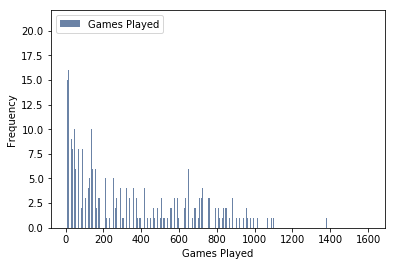

In [356]:
hist = thinkstats2.Hist(df['GP'], label='Games Played')
thinkplot.Hist(hist, width=0.5)
thinkplot.Config(xlabel='Games Played', ylabel='Frequency')

### PMF of Heights

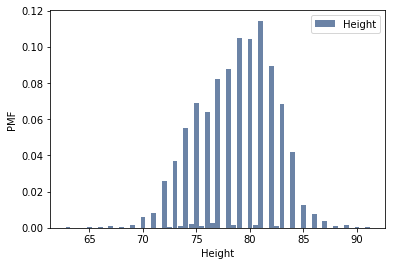

In [342]:
height_pmf = thinkstats2.Pmf(df["Height"], label='Height')
thinkplot.Hist(height_pmf)
thinkplot.Config(xlabel='Height', ylabel='PMF')

### CDF of Heights

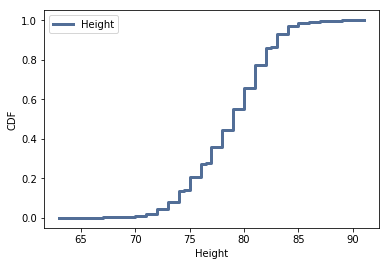

In [344]:
cdf = thinkstats2.Cdf(df['Height'], label='Height')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Height', ylabel='CDF', loc='upper left')

# Section 5

### Pearson Correlation between Height and Blocks per game

In [357]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [358]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [359]:
Corr(df['Height'], df['Blocks per game'])

0.5266061257933642

### Spearman Correlation between Height and Blocks per game

In [360]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [361]:
SpearmanCorr(df['Height'], df['Blocks per game'])

0.6268384575614218

### Visualization of the correlation using scatter plots

In [364]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [365]:
heights_jittered = Jitter(df['Height'], 1.23)

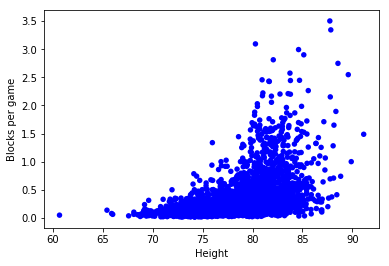

In [376]:
thinkplot.Scatter(heights_jittered, df['Blocks per game'], alpha=1.0)
thinkplot.Config(xlabel='Height', ylabel='Blocks per game')

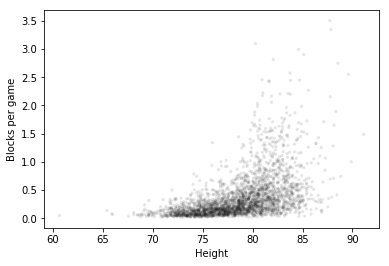

In [377]:
thinkplot.Scatter(heights_jittered, df['Blocks per game'], alpha=0.1, s=10,color='black')
thinkplot.Config(xlabel='Height', ylabel='Blocks per game')

# Section 6

### Hypothesis Testing

In [378]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [406]:
data = df['Height'], df['Blocks per game']
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [407]:
ht.actual, ht.MaxTestStat()

(0.5266061257933642, 0.06367237219088004)